# Project: Step-by-Step Implementation Convolutional Neural Networks (CNN) from Scratch using Numpy.

### 1. Objective:

The objective of this project is to demonstrate the step-by-step implementation of a Convolutional Neural Network (CNN) from scratch to classify images of hand-written digits (0-9), using the MNIST data set. We shall not make use of any Deep Learning frameworks such as Tensorflow, Keras, etc. 

### 2. Input Data:

* We shall use the MNIST dataset of handwritten digits:
  * It has:
    * 60,000 training 
    * 10,000 test examples. 
  * The digits have been size-normalized and centered in a fixed-size 28x28 pixels grayscale image.
  * Source: http://yann.lecun.com/exdb/mnist/

### **3. Development Process:**
#### **3.1. Read and pre-process the training and test data:**

* We begin by reading the training and test MINIST datasets

#### **3.2. Explore and visualize the training and test data:**

* We then inspect and visualize the training and test data sets

#### **3.3. Build the CNN:**

* We then build the convolutional neural network, which consists of two phases:

  1. A forward phase, where the input is passed completely through the network.
  2. A backward phase, where gradients are backpropagated (backprop) and weights are updated.

#### **3.4. Train the CNN:**

* We train the developed CNN on the training dataset.
    
#### **3.5 Evaluate the performance of the trained CNN:**

* We shall evaluate the trained CNN based on the following performance evaluation metrics:

    * Training and validation loss as a function of the number of iterations
    * Training and validation accuracy as a function of the number of iterations
    * The confusion matrix
    * Examine sample mis-classified to get insights into their mis-classification.

### Author: Mohsen Ghazel (mghazel)
* Date: May 15th, 2021

## Step 1: Imports and global variables:


### 1.1) Standard scientific Python imports:

In [1]:
# numpy
import numpy as np
# tensorflow
import tensorflow as tf
# matplotlib
import matplotlib.pyplot as plt
# - import sklearn to use the confusion matrix function
from sklearn.metrics import confusion_matrix
# import itertools
import itertools

# random number generators values
# seed for reproducing the random number generation
from random import seed
# random integers: I(0,M)
from random import randint
# random standard unform: U(0,1)
from random import random
# time
import datetime
# I/O
import os
# sys
import sys

# library for savinga nd reading the model paramaters
import pickle
# zipping variables into paired tuples 
import gzip

# Image package
from IPython.display import Image
# using HTML code
from IPython.core.display import HTML 

# A function that renders the figure in a notebook, instead 
# of displaying a dump of the figure object). 
%matplotlib inline

# check for successful package imports and versions
# python
print("Python version : {0} ".format(sys.version))
# numpy
print("Numpy version  : {0}".format(np.__version__))
# tensorflow
print("Tensorflow version  : {0}".format(tf.__version__))


Python version : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)] 
Numpy version  : 1.19.2
Tensorflow version  : 2.4.1


### 1.2) Global variables:

In [2]:
#-------------------------------------------------------------------------------
# Set the random state to 101
#-------------------------------------------------------------------------------
# - This ensures repeatable results everytime you run the code. 
RANDOM_STATE = 101

#-------------------------------------------------------------------------------
# We set the Numpy pseudo-random generator at a fixed value:
#-------------------------------------------------------------------------------
# - This ensures repeatable results everytime you run the code. 
np.random.seed(RANDOM_STATE)

# the number of visualized images
NUM_VISUALIZED_IMAGES = 25

## Step 2: Load and explore MNIST Dataset:
### 2.1) Load the MNIST dataset:
* Load the MNIST dataset of handwritten digits:
  * 60,000 labelled training examples
  * 10,000 labelled test examples
  * Each handwritten example is 28x28 pixels binary image.

In [3]:
# Load in the data: MNIST
mnist = tf.keras.datasets.mnist
# mnist.load_data() automatically splits traing and test data sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 2.2) Display the number and shape of the training and test subsets:

In [4]:
#------------------------------------------------------
# Training data:
#------------------------------------------------------
# the number of training images
num_train_images = x_train.shape[0]
print("----------------------------------------------")
print("Training data:")
print("----------------------------------------------")
print("x_train.shape: ", x_train.shape)
print("Number of training images: ", num_train_images)
print("Image size: ", x_train.shape[1:])

#------------------------------------------------------
# Test data:
#------------------------------------------------------
# the number of test images
num_test_images = x_test.shape[0]
print("----------------------------------------------")
print("Test data:")
print("----------------------------------------------")
print("x_test.shape: ", x_test.shape)
print("Number of test images: ", num_test_images)
print("Image size: ", x_test.shape[1:])
print("----------------------------------------------")

----------------------------------------------
Training data:
----------------------------------------------
x_train.shape:  (60000, 28, 28)
Number of training images:  60000
Image size:  (28, 28)
----------------------------------------------
Test data:
----------------------------------------------
x_test.shape:  (10000, 28, 28)
Number of test images:  10000
Image size:  (28, 28)
----------------------------------------------


### 2.3) Display the targets/classes:
* The classification of the digits should be: 0 to 9

In [5]:
print("----------------------------------------------")
print("Classes/labels:")
print("----------------------------------------------")
print('The target labels: ' + str(np.unique(y_train)))
print("----------------------------------------------")

----------------------------------------------
Classes/labels:
----------------------------------------------
The target labels: [0 1 2 3 4 5 6 7 8 9]
----------------------------------------------


### 2.4) Examine the number of images for each class of the training and testing subsets:

#### 2.4.1) First implement a functionality to generate the histogram of the number of training and test images:

In [6]:
# create a histogram of the number of images in each class/digit:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% Count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'Count'
         
    xtemp = np.arange(len(unique))
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('Digit')
    plt.ylabel(ylabel_text)
# add title
plt.suptitle('Percentage of images per digit (0-9)')
plt.show()

<Figure size 432x288 with 0 Axes>

#### 2.4.2)  Call the functionality to generate the histogram of the number of training and test images:

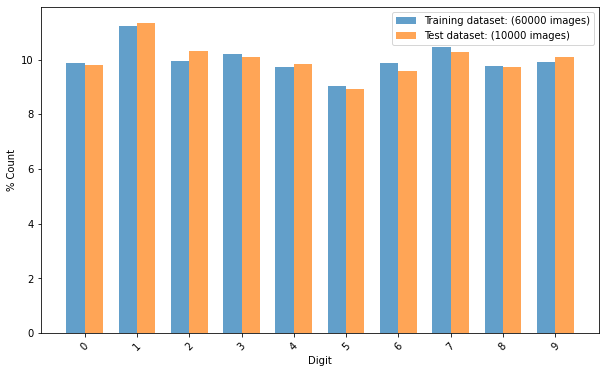

In [7]:
#----------------------------------------------------
# Call the function to create the histograms of the 
# training and test images:
#----------------------------------------------------
# set the figure size
plt.figure(figsize=(10, 6))
# training data histogram
plot_bar(y_train, loc='left')
# test data histogram
plot_bar(y_test, loc='right')
# legend
plt.legend([
    'Training dataset: ({0} images)'.format(len(y_train)), 
    'Test dataset: ({0} images)'.format(len(y_test)), 
])
plt.show()

### 2.5) Visualize some of the training and test images and their associated targets:

#### 2.5.1)  First implement a visualization functionality to visualize the number of randomly selected images:

In [8]:
"""
# A utility function to visualize multiple images:
"""
def visualize_images_and_labels(num_visualized_images = 25, dataset_flag = 1):
  """To visualize images.

      Keyword arguments:
         - num_visualized_images -- the number of visualized images (deafult 25)
         - dataset_flag -- 1: training dataset, 2: test dataset
      Return:
         - None
  """
  #--------------------------------------------
  # the suplot grid shape:
  #--------------------------------------------
  num_rows = 5
  # the number of columns
  num_cols = num_visualized_images // num_rows
  # setup the subplots axes
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 10))
  # set a seed random number generator for reproducible results
  seed(RANDOM_STATE)
  # iterate over the sub-plots
  for row in range(num_rows):
      for col in range(num_cols):
        # get the next figure axis
        ax = axes[row, col];
        # turn-off subplot axis
        ax.set_axis_off()
        #--------------------------------------------
        # if the dataset_flag = 1: Training data set
        #--------------------------------------------
        if ( dataset_flag == 1 ): 
          # generate a random image counter
          counter = randint(0,num_train_images)
          # get the training image
          image = np.squeeze(x_train[counter,:])
          # get the target associated with the image
          label = y_train[counter]
        #--------------------------------------------
        # dataset_flag = 2: Test data set
        #--------------------------------------------
        else: 
          # generate a random image counter
          counter = randint(0,num_test_images)
          # get the test image
          image = np.squeeze(x_test[counter,:])
          # get the target associated with the image
          label = y_test[counter]
        #--------------------------------------------
        # display the image
        #--------------------------------------------
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        # set the title showing the image label
        ax.set_title('y =' + str(label), size = 8)

#### 2.5.2) Visualize some of the training images and their associated targets:

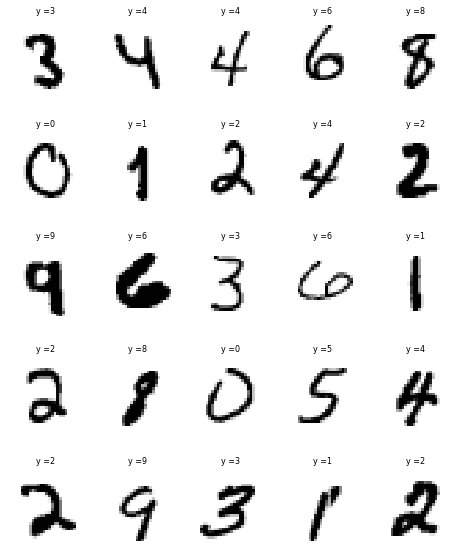

In [9]:
# call the function to visualize the training images
visualize_images_and_labels(NUM_VISUALIZED_IMAGES, 1)

#### 2.5.3) Visualize some of the test images and their associated targets:

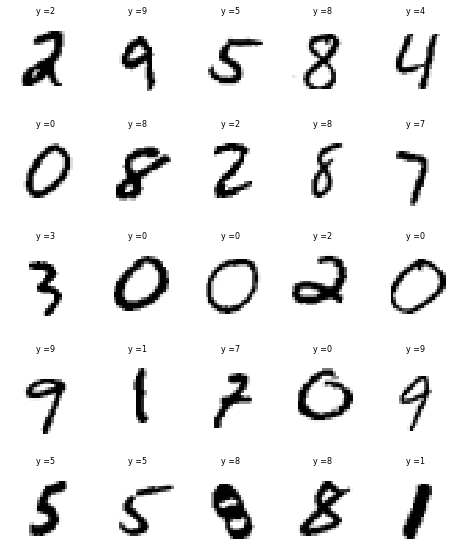

In [10]:
# call the function to visualize the training images
visualize_images_and_labels(NUM_VISUALIZED_IMAGES, 2)

## Step 3: Build the Convolutional Network from Scratch:

* Building the convolutional neural network, which consists of two phases:

  1. A forward phase, where the input is passed completely through the network.
  2. A backward phase, where gradients are backpropagated (backprop) and weights are updated.

* In this section, we shall implement the various functinalities of each of these phases for the following CNN model architecture. 

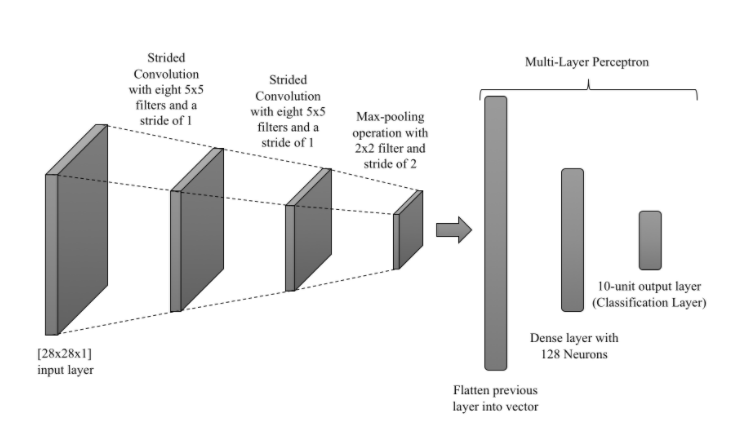

In [11]:
#-------------------------------------------------------------------------------
# Display the architecture of the implmented model:
#-------------------------------------------------------------------------------
# height
img_height = 1000
# width
img_width = 800
# display the image
Image(filename = "Implemented-CNN-Model.PNG", width=img_width, height=img_height)

### 3.1) Forward Phase:

* The forward phase, where the input is passed completely through the network.

#### 3.1.1) Utlities functions:

* Utility methods for a Convolutional Neural Network:

In [12]:
def initializeFilter(size, scale = 1.0):
    """
    Utility method for initialzing the convolutional layers filters
    """
    stddev = scale/np.sqrt(np.prod(size))
    return np.random.normal(loc = 0, scale = stddev, size = size)

def initializeWeight(size):
    """
    Utility method for initialzing the full-connected layers weights and biases
    """
    return np.random.standard_normal(size=size) * 0.01

def nanargmax(arr):
    """
    Utility method for computing the non-NAN argmax()
    """
    idx = np.nanargmax(arr)
    idxs = np.unravel_index(idx, arr.shape)
    return idxs    

#### 3.1.2) Forward operations for a convolutional neural network:

* Functions for implementing the forward operations for the CNN:

In [13]:
def convolution(image, filt, bias, s=1):
    '''
    Confolves `filt` over `image` using stride `s`
    '''
    (n_f, n_c_f, f, _) = filt.shape # filter dimensions
    n_c, in_dim, _ = image.shape # image dimensions
    
    out_dim = int((in_dim - f)/s)+1 # calculate output dimensions
    
    assert n_c == n_c_f, "Dimensions of filter must match dimensions of input image"
    
    out = np.zeros((n_f,out_dim,out_dim))
    
    # convolve the filter over every part of the image, adding the bias at each step. 
    for curr_f in range(n_f):
        curr_y = out_y = 0
        while curr_y + f <= in_dim:
            curr_x = out_x = 0
            while curr_x + f <= in_dim:
                out[curr_f, out_y, out_x] = np.sum(filt[curr_f] * image[:,curr_y:curr_y+f, curr_x:curr_x+f]) + bias[curr_f]
                curr_x += s
                out_x += 1
            curr_y += s
            out_y += 1
        
    return out

def maxpool(image, f=2, s=2):
    '''
    Downsample `image` using kernel size `f` and stride `s`
    '''
    n_c, h_prev, w_prev = image.shape
    
    h = int((h_prev - f)/s)+1
    w = int((w_prev - f)/s)+1
    
    downsampled = np.zeros((n_c, h, w))
    for i in range(n_c):
        # slide maxpool window over each part of the image and assign the max value at each step to the output
        curr_y = out_y = 0
        while curr_y + f <= h_prev:
            curr_x = out_x = 0
            while curr_x + f <= w_prev:
                downsampled[i, out_y, out_x] = np.max(image[i, curr_y:curr_y+f, curr_x:curr_x+f])
                curr_x += s
                out_x += 1
            curr_y += s
            out_y += 1
    return downsampled

def softmax(X):
    '''
    Computes the Softmax()
    '''
    out = np.exp(X)
    return out/np.sum(out)

def categoricalCrossEntropy(probs, label):
    '''
    Computes the categorical entropy
    '''
    return -np.sum(label * np.log(probs))

def predict(image, f1, f2, w3, w4, b1, b2, b3, b4, conv_s = 1, pool_f = 2, pool_s = 2):
    '''
    Make predictions with trained filters/weights. 
    '''
    # convolution operation
    conv1 = convolution(image, f1, b1, conv_s) 
    #relu activation
    conv1[conv1<=0] = 0 
    
    # second convolution operation
    conv2 = convolution(conv1, f2, b2, conv_s) 
    # pass through ReLU non-linearity
    conv2[conv2<=0] = 0 
    
    # maxpooling operation
    pooled = maxpool(conv2, pool_f, pool_s) 
    (nf2, dim2, _) = pooled.shape
    # flatten pooled layer
    fc = pooled.reshape((nf2 * dim2 * dim2, 1)) 
    
    # first dense layer
    z = w3.dot(fc) + b3 
    # pass through ReLU non-linearity
    z[z<=0] = 0 
    
    # second dense layer
    out = w4.dot(z) + b4 
    # predict class probabilities with the softmax activation function
    probs = softmax(out) 
    
    return np.argmax(probs), np.max(probs)

#### 3.1.3) Backward operations for a convolutional neural network:

* Functions for implementing the backward operations for the CNN:

In [14]:
def convolutionBackward(dconv_prev, conv_in, filt, s):
    '''
    Backpropagation through a convolutional layer. 
    '''
    (n_f, n_c, f, _) = filt.shape
    (_, orig_dim, _) = conv_in.shape
    ## initialize derivatives
    dout = np.zeros(conv_in.shape) 
    dfilt = np.zeros(filt.shape)
    dbias = np.zeros((n_f,1))
    for curr_f in range(n_f):
        # loop through all filters
        curr_y = out_y = 0
        while curr_y + f <= orig_dim:
            curr_x = out_x = 0
            while curr_x + f <= orig_dim:
                # loss gradient of filter (used to update the filter)
                dfilt[curr_f] += dconv_prev[curr_f, out_y, out_x] * conv_in[:, curr_y:curr_y+f, curr_x:curr_x+f]
                # loss gradient of the input to the convolution operation (conv1 in the case of this network)
                dout[:, curr_y:curr_y+f, curr_x:curr_x+f] += dconv_prev[curr_f, out_y, out_x] * filt[curr_f] 
                curr_x += s
                out_x += 1
            curr_y += s
            out_y += 1
        # loss gradient of the bias
        dbias[curr_f] = np.sum(dconv_prev[curr_f])
    
    return dout, dfilt, dbias


def maxpoolBackward(dpool, orig, f, s):
    '''
    Backpropagation through a maxpooling layer. The gradients are passed through the indices of greatest value in the original maxpooling during the forward step.
    '''
    (n_c, orig_dim, _) = orig.shape
    
    dout = np.zeros(orig.shape)
    
    for curr_c in range(n_c):
        curr_y = out_y = 0
        while curr_y + f <= orig_dim:
            curr_x = out_x = 0
            while curr_x + f <= orig_dim:
                # obtain index of largest value in input for current window
                (a, b) = nanargmax(orig[curr_c, curr_y:curr_y+f, curr_x:curr_x+f])
                dout[curr_c, curr_y+a, curr_x+b] = dpool[curr_c, out_y, out_x]
                
                curr_x += s
                out_x += 1
            curr_y += s
            out_y += 1
        
    return dout

#### 3.1.4) Full Forward-Backward pass for a convolutional neural network:

* Function for running a full forward-backward cycle for the CNN:

In [15]:
def conv_forward_backward_pass(image, label, params, conv_s, pool_f, pool_s, lr=0.01):
    """
    A function for running a full forward-backward cycle for the CNN:
    """
    # get the parameters
    [f1, f2, w3, w4, b1, b2, b3, b4] = params 
    
    #================================================
    # Step 1: Forward operation:
    #================================================
    # Convolutional layer: Conv1:
    #-----------------------------------------------
    # convolution operation
    conv1 = convolution(image, f1, b1, conv_s)
    # pass through ReLU non-linearity
    conv1[conv1<=0] = 0 
    
    #-----------------------------------------------
    # Convolutional layer: Conv2:
    #-----------------------------------------------
    # second convolution operation
    conv2 = convolution(conv1, f2, b2, conv_s) 
    # pass through ReLU non-linearity
    conv2[conv2<=0] = 0 
    
    #-----------------------------------------------
    # Maxpooling layer: pool:
    #-----------------------------------------------
    # maxpooling operation
    pooled = maxpool(conv2, pool_f, pool_s) 
    # get the dimensions
    (nf2, dim2, _) = pooled.shape
    # flatten pooled layer
    fc = pooled.reshape((nf2 * dim2 * dim2, 1)) 
    
    #-----------------------------------------------
    # First dense layer
    #-----------------------------------------------
    # Apply the linear function
    z = w3.dot(fc) + b3 
    # pass through ReLU non-linearity
    z[z<=0] = 0 
    
    #-----------------------------------------------
    # Second dense layer
    #-----------------------------------------------
    # Apply the linear function
    out = w4.dot(z) + b4 
     
    #-----------------------------------------------
    # Softmax layer
    #-----------------------------------------------
    # predict class probabilities with the softmax activation function
    probs = softmax(out)
    
    #================================================
    # Step 2: The loss function:
    #================================================
    # compute the # categorical cross-entropy loss
    loss = categoricalCrossEntropy(probs, label) 
        
    #================================================
    # Step 3: The Backward Operation
    #================================================
    # derivative of loss w.r.t. final dense layer output
    dout = probs - label 
    # loss gradient of final dense layer weights
    dw4 = dout.dot(z.T) 
    # loss gradient of final dense layer biases
    db4 = np.sum(dout, axis = 1).reshape(b4.shape) 
    # loss gradient of first dense layer outputs 
    dz = w4.T.dot(dout) 
    # backpropagate through ReLU 
    dz[z<=0] = 0 
    dw3 = dz.dot(fc.T)
    db3 = np.sum(dz, axis = 1).reshape(b3.shape)
    # loss gradients of fully-connected layer (pooling layer)
    dfc = w3.T.dot(dz) 
    # reshape fully connected into dimensions of pooling layer
    dpool = dfc.reshape(pooled.shape) 
    
    # backprop through the max-pooling layer(only neurons with highest activation in window get updated)
    dconv2 = maxpoolBackward(dpool, conv2, pool_f, pool_s)
    # backpropagate through ReLU
    dconv2[conv2<=0] = 0 
    
    # backpropagate previous gradient through second convolutional layer.
    dconv1, df2, db2 = convolutionBackward(dconv2, conv1, f2, conv_s) 
    # backpropagate through ReLU
    dconv1[conv1<=0] = 0 
    
    # backpropagate previous gradient through first convolutional layer.
    dimage, df1, db1 = convolutionBackward(dconv1, image, f1, conv_s) 
    
    # store the gradient of the parameters
    grads = [df1, df2, dw3, dw4, db1, db2, db3, db4] 
    
    #================================================
    # Step 4: The Gradient-Descent Optimization:
    #================================================
    # Apply Gradient Descent to update the paramaters:
    #-----------------------------------------------
    # update f1:
    #------------------------------------------------
    f1 -= lr * df1
    #------------------------------------------------
    # update f2:
    #------------------------------------------------
    f2 -= lr * df2
    #------------------------------------------------
    # update w3:
    #------------------------------------------------
    w3 -= lr * dw3
    #------------------------------------------------
    # update w4:
    #------------------------------------------------
    w4 -= lr * dw4
    #------------------------------------------------
    # update b1:
    #------------------------------------------------
    b1 -= lr * db1
    #------------------------------------------------
    # update b2:
    #------------------------------------------------
    b2 -= lr * db2
    #------------------------------------------------
    # update b3:
    #------------------------------------------------
    b3 -= lr * db3
    #------------------------------------------------
    # update b4:
    #------------------------------------------------
    b4 -= lr * db4
    
    #------------------------------------------------
    # Store the gradients:
    #------------------------------------------------
    grads = [df1, df2, dw3, dw4, db1, db2, db3, db4] 
    
    #------------------------------------------------
    # Store the updated params
    #------------------------------------------------
    params = [f1, f2, w3, w4, b1, b2, b3, b4]
    
    return grads, params, loss

## Step 4: Train the built CNN model:

### 4.1) A  function for training the CNN model:

In [16]:
def train(x_train, y_train, num_classes = 10, lr = 0.01, img_depth = 1,\
          f = 5, num_filt1 = 8, num_filt2 = 8, num_epochs = 2, save_path = 'params.pkl'):
    """
    A  function for training the CNN model
    """
    #-------------------------------------
    # Initializing all the parameters
    #-------------------------------------
    f1, f2, w3, w4 = (num_filt1, img_depth, f, f), (num_filt2, num_filt1, f, f), (128, 800), (10, 128)
    f1 = initializeFilter(f1)
    f2 = initializeFilter(f2)
    w3 = initializeWeight(w3)
    w4 = initializeWeight(w4)

    b1 = np.zeros((f1.shape[0],1))
    b2 = np.zeros((f2.shape[0],1))
    b3 = np.zeros((w3.shape[0],1))
    b4 = np.zeros((w4.shape[0],1))

    #-------------------------------------
    # Set the parameters
    #-------------------------------------
    params = [f1, f2, w3, w4, b1, b2, b3, b4]

    #-------------------------------------
    # Cost array for each epoch
    #-------------------------------------
    epoch_cost = []
    #-------------------------------------
    # Accuracy array for each epoch
    #-------------------------------------
    epoch_accuracy = []
    
    #-------------------------------------
    # Iterate over the epochs:
    #-------------------------------------
    for epoch in range(num_epochs):
        print('---------------------------------------------------------------')
        print('Training Epoch # %d of %d' % (epoch + 1, num_epochs))
        print('---------------------------------------------------------------')

        #-------------------------------------
        # Shuffle the training data
        #-------------------------------------
        permutation = np.random.permutation(len(y_train))
        train_images = x_train[permutation]
        train_labels = y_train[permutation]

        #--------------------------------------------------------
        # Partial training metrics of the model: 100 images
        #--------------------------------------------------------
        # compute the average loss for the 100 images
        loss_100_images = 0
        # compute the average accuracy 100 images
        accuracy_100_images = 0
        
        #--------------------------------------------------------
        # Training metrics of the model: For each epoch
        #--------------------------------------------------------
        # compute the average loss for each epoch
        loss_epoch = 0
        # compute the average accuracy for each epoch
        accuracy_epoch = 0

        # the numbe rof training images
        num_train_images = len(y_train)
        # iterate over the training images
        for i, (im, label) in enumerate(zip(train_images, train_labels)):
            if i % 100 == 99:
                # display a message
                print('Processing image #: {0} of {1}'.format(i, num_train_images))
                print('---------------------------------------------------------------')
                print('[Step %d]: The last 100 images: Average: Loss %.3f | Accuracy: %d%%'\
                      %(i + 1, loss_100_images / 100, accuracy_100_images))
                print('---------------------------------------------------------------')
                # reset the average to 0
                loss_100_images = 0
                # reset the average accuracy to 0
                accuracy_100_images = 0
            
            #------------------------------------------------
            # Reshape the input image and its label
            #------------------------------------------------
            # reshape to 3D shape
            im = np.expand_dims(im, axis=0)
            # convert label to one-hot shape
            label_1_hot = np.eye(num_classes)[int(label)].reshape(num_classes, 1) 
            
            #------------------------------------------------
            # Call the convolution function
            #------------------------------------------------
            grads, params, loss = conv_forward_backward_pass(im, label_1_hot, params, 1, 2, 2, lr)
            
            #------------------------------------------------
            # Predict the class of thetraining image using 
            # the trained model
            #------------------------------------------------
            pred_class, pred_prob = predict(im, f1, f2, w3, w4, b1, b2, b3, b4, 1, 2, 2)
            
            #------------------------------------------------
            # Compute the accuracy:
            #------------------------------------------------
            accuracy = 1 if pred_class == label else 0
            
            #------------------------------------------------
            # Update the performance evaluation metrics for 
            # 100 images: 
            #------------------------------------------------
            # update the average cost 
            loss_100_images += loss
            
            # update the accuracy
            accuracy_100_images += accuracy
            
            #------------------------------------------------
            # Update the performance evaluation metrics for 
            # 1each epoch
            #------------------------------------------------
            # update the average loss for each epoch
            loss_epoch += loss
            # update the average accuracy for each epoch
            accuracy_epoch += accuracy
        

        #------------------------------------------------
        # update the epoch average cost 
        #------------------------------------------------
        loss_epoch /= num_train_images
        # append to the cost
        epoch_cost.append(loss_epoch)
        
        #------------------------------------------------
        # update the epoch average accuracy
        #------------------------------------------------
        accuracy_epoch /= num_train_images
        # append to the accuracy
        epoch_accuracy.append(accuracy_epoch)
        
    # append the params and loss together
    to_save = [params, epoch_cost, epoch_accuracy]
    # save the params and loss to a file
    with open(save_path, 'wb') as file:
        pickle.dump(to_save, file)

    # return the cost
    return epoch_cost, epoch_accuracy

### 4.2) Train the CNN model:

------------------------------------------
Train the CNN model:
------------------------------------------
Number of train images =  1000
------------------------------------------
---------------------------------------------------------------
Training Epoch # 1 of 5
---------------------------------------------------------------
Processing image #: 99 of 1000
---------------------------------------------------------------
[Step 100]: The last 100 images: Average: Loss 2.281 | Accuracy: 25%
---------------------------------------------------------------
Processing image #: 199 of 1000
---------------------------------------------------------------
[Step 200]: The last 100 images: Average: Loss 2.300 | Accuracy: 25%
---------------------------------------------------------------
Processing image #: 299 of 1000
---------------------------------------------------------------
[Step 300]: The last 100 images: Average: Loss 2.299 | Accuracy: 23%
---------------------------------------------

Processing image #: 399 of 1000
---------------------------------------------------------------
[Step 400]: The last 100 images: Average: Loss 0.074 | Accuracy: 99%
---------------------------------------------------------------
Processing image #: 499 of 1000
---------------------------------------------------------------
[Step 500]: The last 100 images: Average: Loss 0.203 | Accuracy: 100%
---------------------------------------------------------------
Processing image #: 599 of 1000
---------------------------------------------------------------
[Step 600]: The last 100 images: Average: Loss 0.040 | Accuracy: 100%
---------------------------------------------------------------
Processing image #: 699 of 1000
---------------------------------------------------------------
[Step 700]: The last 100 images: Average: Loss 0.218 | Accuracy: 100%
---------------------------------------------------------------
Processing image #: 799 of 1000
-------------------------------------------------

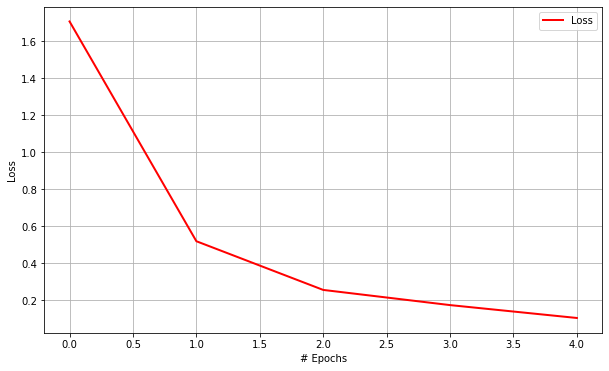

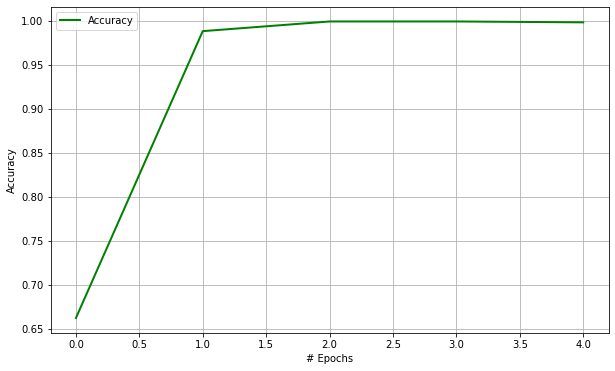

In [17]:
#------------------------------------------------
# call the above functionality to train the model:
#------------------------------------------------
# The name of the saved
#------------------------------------------------
save_path = 'params.pkl'
#------------------------------------------------
# - The MNIST dataset has: 
#------------------------------------------------
#   - 60,000 training images
#   - 10,000 test images
#
# - Using the full dataset to train 
#   the developed CNN is time consuing
# - We shall only use a subset of the 
#   dataset.
#------------------------------------------------
# the number of used training images
num_used_train_images = 1000

#------------------------------------------------
# Training parameters:
#------------------------------------------------
# the number of classes
num_classes = 10
# the learning rate
learning_rate = 0.01
# the image size
img_depth = 1
# the filter size
f = 5
# CONV-1: number of filters
num_filt1 = 8
# CONV-1: number of filters
num_filt2 = 8
# the number of training epochs
num_epochs = 5

#------------------------------------------------
# Training data subset
#------------------------------------------------
x_train = x_train[:num_used_train_images]
y_train = y_train[:num_used_train_images]

#------------------------------------------------
# normalize x_train
#------------------------------------------------
x_train = x_train - np.mean(x_train)
x_train /= np.std(x_train)

#------------------------------------------------
# reshape y_train 
#------------------------------------------------
y_train.reshape(len(y_train), 1)

#------------------------------------------------
# train the model
#------------------------------------------------
# display a message
print('------------------------------------------')
print('Train the CNN model:')
print('------------------------------------------')
print('Number of train images = ', num_used_train_images)
print('------------------------------------------')
cost, accuracy = train(x_train, y_train, num_classes, learning_rate,\
                 img_depth, f, num_filt1, num_filt2 ,\
                 num_epochs, save_path)
print('------------------------------------------')
print('The CNN model was trained successfully!')
print('------------------------------------------')

#------------------------------------------------
# Plot cost the Cost function
#------------------------------------------------
# set the figure size
plt.figure(figsize=(10, 6))
# plot the cost
plt.plot(cost, 'r-', linewidth = 2.0, label='Loss')
# xlabel
plt.xlabel('# Epochs')
# ylabel
plt.ylabel('Loss')
# legend
plt.legend()
# set grid on
plt.grid()
# show the figure
plt.show()

#------------------------------------------------
# Plot cost the Accuracy function
#------------------------------------------------
# set the figure size
plt.figure(figsize=(10, 6))
# plot the accuracy
plt.plot(accuracy, 'g-', linewidth = 2.0, label='Accuracy')
# xlabel
plt.xlabel('# Epochs')
# ylabel
plt.ylabel('Accuracy')
# legend
plt.legend()
# set the grid on
plt.grid()
# show the figure
plt.show()

## Step 5: Evaluate the trained CNN model:

------------------------------------------
Evaluate the performance of the trained CNN model:
------------------------------------------
Number of test images =  1000
------------------------------------------
-----------------------------------------
Computing accuracy over test set:
-----------------------------------------
Accuracy: 100.00%
Accuracy: 92.08%
Accuracy: 94.03%
Accuracy: 90.70%
Accuracy: 91.52%
Accuracy: 91.22%
Accuracy: 90.85%
Accuracy: 90.87%
Accuracy: 91.39%
Accuracy: 91.45%
-----------------------------------------
Overall Accuracy: 91.60
-----------------------------------------


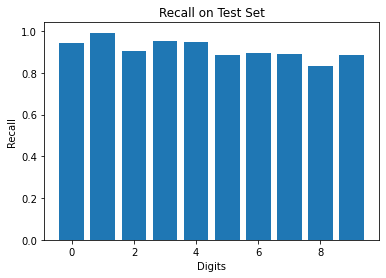

In [18]:
#------------------------------------------------
# Evaluate the trained the model:
#------------------------------------------------
#------------------------------------------------
# - The MNIST dataset has: 
#------------------------------------------------
#   - 60,000 training images
#   - 10,000 test images
#
# - Using the full dataset to train 
#   the developed CNN is time consuing
# - We shall only use a subset of the 
#   dataset.
#------------------------------------------------
# the number of used test image
num_used_test_images = 1000  

# display a message
print('------------------------------------------')
print('Evaluate the performance of the trained CNN model:')
print('------------------------------------------')
print('Number of test images = ', num_used_test_images)
print('------------------------------------------')
#------------------------------------------------
# load the trained model
#------------------------------------------------
params, cost, accuracy = pickle.load(open(save_path, 'rb'))
# get the model paramaters
[f1, f2, w3, w4, b1, b2, b3, b4] = params

#------------------------------------------------
# Get test data
#------------------------------------------------
# Test data subset
#------------------------------------------------
x_test = x_test[:num_used_test_images]
y_test = y_test[:num_used_test_images]

#------------------------------------------------
# normalize x_test
#------------------------------------------------
x_test = x_test - np.mean(x_test)
x_test /= np.std(x_test)

#------------------------------------------------
# reshape y_train 
#------------------------------------------------
y_test.reshape(len(y_test), 1)

#------------------------------------------------
# initialize the correlation
#------------------------------------------------
corr = 0
digit_count = [0 for i in range(10)]
digit_correct = [0 for i in range(10)]
   
print('-----------------------------------------')
print("Computing accuracy over test set:")
print('-----------------------------------------')

# iterate over the test images
for i, (im, label) in enumerate(zip(x_test, y_test)):
    #------------------------------------------------
    # reshape the input image and its label
    #------------------------------------------------
    # reshape to 3D shape
    im = np.expand_dims(im, axis=0) 
    # call the prediction function to classify the input test image
    pred, prob = predict(im, f1, f2, w3, w4, b1, b2, b3, b4)
    # increment the the class for this image
    digit_count[int(label)]+=1
    # check if the prediction is correct
    if (pred == label):
        # increment the number of correct predictions
        corr += 1
        digit_correct[pred] += 1
    # display a message
    if ( i % 100 == 0 ):
        print("Accuracy: %0.2f%%" % (float(corr/(i+1))*100))
    
print('-----------------------------------------')
print("Overall Accuracy: %.2f" % (float(corr/num_used_test_images*100)))
print('-----------------------------------------')
x = np.arange(10)
digit_recall = [x/y for x,y in zip(digit_correct, digit_count)]
plt.xlabel('Digits')
plt.ylabel('Recall')
plt.title("Recall on Test Set")
plt.bar(x,digit_recall)
plt.show()

## Part 6: Display a final message after successful execution completion:

In [19]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ 
      str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-05-23 14:25:15...Goodbye!

